In [1]:
using Distributions
using Plots 
using Random
using Statistics


In [2]:
Random.seed!(1)

TaskLocalRNG()

### QUESTION

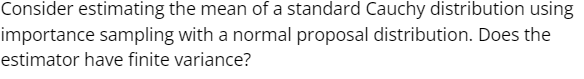

### Solution

#### Since Target Distribution (Standard Cauchy Distribution ) does not have a finite variance , so "accept-reject" method will not be able to tell whether estimator have finite variance or not ...
#### So we find out by using simulations.This will not tell exactly but give a good guess of whether estimator have finite variance or not .

In [3]:
### Taking standard Normal Distribution as proposal distribution
function estimator_generator()
    samples = 1000
    normal_sample = rand(Normal(),1000)
    ratio_array= []
    for i in 1:samples
        ratio= normal_sample[i]*(pdf(Cauchy(),normal_sample[i]))/(pdf(Normal(),normal_sample[i]))
        push!(ratio_array,ratio)
    end
    return mean(ratio_array)
end    

estimator_generator (generic function with 1 method)

In [4]:
r = 1000
esti =[]
for i in 1:r
    push!(esti,estimator_generator())
end
println("Sample mean of r number of estimators comes out to be  ",mean(esti))
println("Sample variance  of r number of estimators comes out to be  ",var(esti))

Sample mean of r number of estimators comes out to be  0.14517064291672319
Sample variance  of r number of estimators comes out to be  9.53206215716969


#### Hence Variance of estimator comes out to be finite.....

### QUESTION

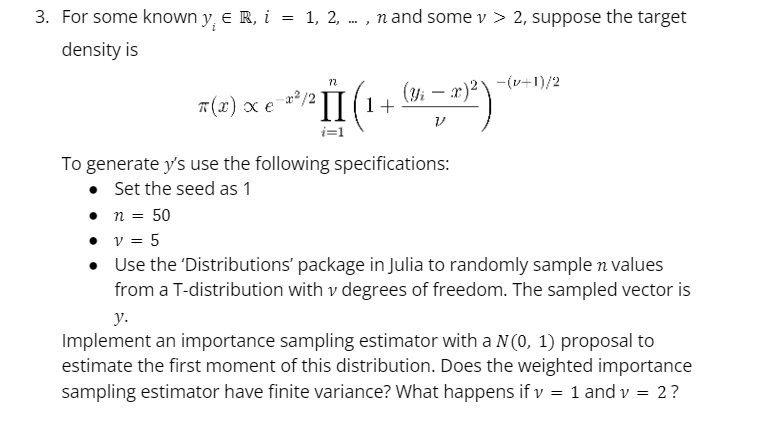

### Solution

In [5]:
function Importance_Sample(v)
      
      proposal_samples = 10000;
      sample_vector = rand(Normal(),proposal_samples)
      sample_weigth = [];
      Numerator = [] 
     
      n=50;
      weigth=1;

      for i in 1:proposal_samples
           samples_TDis = rand(TDist(v),n)
           for j in 1:n
              weigth =  weigth*((1+((samples_TDis[j]-sample_vector[i])^2)/v)^(-(v+1)/2))
           end
           push!(sample_weigth,weigth)  # Preparing importance Sample weigths ...or ..denominator 

           push!(Numerator,sample_vector[i]*weigth) # Preparing numerator
           weigth =1
      end 
      
      estimate = sum(Numerator)/sum(sample_weigth)
      return estimate
end      

Importance_Sample (generic function with 1 method)

In [6]:
function estim_Dist(v)
    rep= 1000
    est = []
    for i in  1:rep
        push!(est,Importance_Sample(v))
    end
    return est
end    

estim_Dist (generic function with 1 method)

### v=5

In [7]:
estimators = estim_Dist(5)
println("So the first moment of given target distribution comes out to be :  ",mean(estimators))
println("Variance for this degree of freedom comes out to be:   ", var(estimators))

So the first moment of given target distribution comes out to be :  -0.004710548546242634
Variance for this degree of freedom comes out to be:   0.009755317699322743


In [8]:
1000*var(estimators)

9.755317699322744

#### So variance comes out to be finite 

### v=2

In [9]:
estimators = estim_Dist(2)

println("Variance for this degree of freedom  comes out to be:   ", var(estimators))


Variance for this degree of freedom  comes out to be:   0.02051731781067602


In [10]:
1000*var(estimators)

20.51731781067602

### v=1

In [11]:
estimators = estim_Dist(1)

println("Variance for this degree of freedom  comes out to be:   ", var(estimators))

Variance for this degree of freedom  comes out to be:   0.037275565787589386


In [12]:
1000*var(estimators)

37.275565787589386

### As degree  of freedom decreases from 5 to 2 to 1, variance of estimators increases which indicates that t-distribution of small degree of freedom are not good proposals distributions

### QUESTION

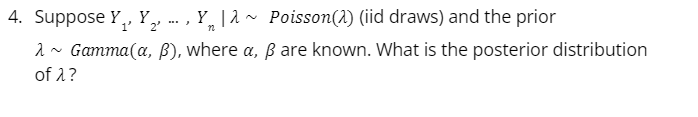

### Solution:

 $$ \pi(\lambda|y)\ \propto\ \ \pi(\lambda)f(y1,y2....yn|\lambda) \\$$ 
$$   \propto\ \ \ \lambda^{\alpha-1}e^{-\beta\lambda}\Pi\frac{e^{-\lambda}\lambda^{y}}{y!} $$

  $$\propto\ \ \ \lambda^{\alpha-1}e^{-\beta\lambda}(e^{-n\lambda}\lambda^{\Sigma y})$$  
  $$\propto\ \ \ \lambda^{\alpha-1 + \Sigma y}e^{-(\beta+n)\lambda}$$     
 ##### So from above, one can say that posterior distribution of $\lambda$ is   Gamma($\alpha+ \Sigma y,(\beta+n)$)                            